# Tugas Data Analysis

Nama : Hendrico Vernando Bolang

NIM(dulu) : 16519325

Universitas : Kyoto Computer Gakuin

Tanggal mulai pengerjaan tugas : 13 November 2020

## Import Library

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import NearestNeighbors


# Data Observation

Disini saya akan menggunakan data dari file takemeout.csv 

takemeout.csv berisi data tentang seberapa penting hal-hal berikut dengan calon pacar

In [104]:
df = pd.read_csv('takemeout.csv')

In [105]:
df.head()

Timestamp Siapa nama kamu? Cewek atau cowok nih?  \
0  2020/10/31 3:39:25 PM GMT+7  A**************                 Cowok   
1  2020/10/31 3:39:36 PM GMT+7            L****                 Cewek   
2  2020/10/31 3:39:38 PM GMT+7     Y***********                 Cowok   
3  2020/10/31 3:39:42 PM GMT+7             a***                 Cowok   
4  2020/10/31 3:39:43 PM GMT+7            B****                 Cowok   

   Seberapa penting quality time bareng calon pacar untuk kamu?  \
0                                                  5              
1                                                  5              
2                                                  4              
3                                                  5              
4                                                  5              

   Seberapa penting physical touch sama calon pacar untuk kamu?  \
0                                                  5              
1                                                  5              
2                                                  3              
3                                                  5              
4                                                  5              

   Seberapa penting word of affirmation dari calon pacar untuk kamu?  \
0                                                  4                   
1                                                  3                   
2                                                  4                   
3                                                  5                   
4                                                  5                   

   Seberapa penting dapet kado dari calon pacar untuk kamu?  \
0                                                  1          
1                                                  2          
2                                                  4          
3                                                  2          
4                                                  2          

   Seberapa penting bantuan dari calon pacar untuk kamu?  
0                                                  3      
1                                                  2      
2                                                  4      
3                                                  3      
4                                                  4

# Data Cleaning

Keluarkan kolom timestamp 

In [106]:
df = df.iloc[:,1:]

Persingkat nama kolom agar lebih mudah diakses

In [107]:
df.columns = ["name","gender","time","touch","word","present","help"]

Karena data pada kolom gender hanya dua jenis yaitu Cowok atau Cewek maka kita bisa memisalkan Cowok sebagai angka 1 dan Cewek sebagai angka 2 agar kita dapat lebih mudah mengelompokkannya

In [108]:
df["gender"]=df["gender"].apply(lambda x: 1 if x == "Cowok" else 2 )

In [109]:
df.head()

name  gender  time  touch  word  present  help
0  A**************       1     5      5     4        1     3
1            L****       2     5      5     3        2     2
2     Y***********       1     4      3     4        4     4
3             a***       1     5      5     5        2     3
4            B****       1     5      5     5        2     4

Saya ingin melihat bagaimana distribusi jumlah nilai yang dipilih dengan cara menambahkan satu kolom tambahan yaitu kolom jumlah

In [110]:
sums=[]
for i in range(len(df)) :
    jum = 0
    for j in range(2,len(df.columns)) :
        col = df.columns[j]
        jum = jum + df[col][i]
    sums.append(jum)
df.insert(len(df.columns),"jumlah",sums)
df.head()

name  gender  time  touch  word  present  help  jumlah
0  A**************       1     5      5     4        1     3      18
1            L****       2     5      5     3        2     2      17
2     Y***********       1     4      3     4        4     4      19
3             a***       1     5      5     5        2     3      20
4            B****       1     5      5     5        2     4      21

Pisahkan data cowok dan data cewek untuk dianalisis nanti

In [111]:
df_cowok = df[df["gender"]==1]
df_cewek = df[df["gender"]==2]

### Total data

In [120]:
print("Total Data", len(df))
print("Total Data Cowok", len(df_cowok))
print("Total Data Cewek", len(df_cewek))

Total Data 101
Total Data Cowok 81
Total Data Cewek 20


## Data Analysis

Dengan menggunakan Box Plot kita dapat melihat distribusi data 

Boxplot time


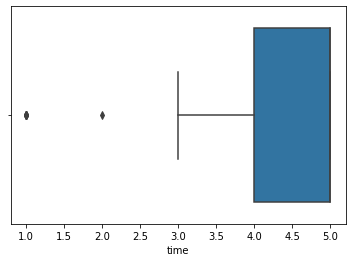

Rata-rata dari kolom time 4.099009900990099

Boxplot touch


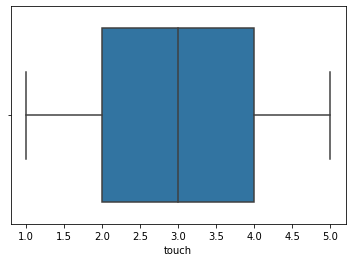

Rata-rata dari kolom touch 3.1683168316831685

Boxplot word


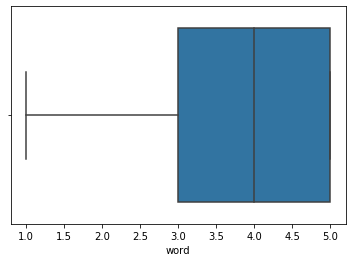

Rata-rata dari kolom word 3.722772277227723

Boxplot present


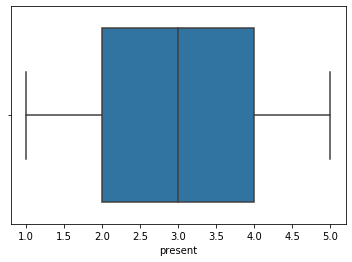

Rata-rata dari kolom present 2.732673267326733

Boxplot help


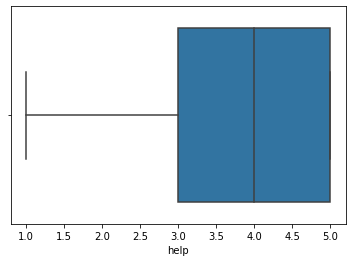

Rata-rata dari kolom help 3.7524752475247523

Boxplot jumlah


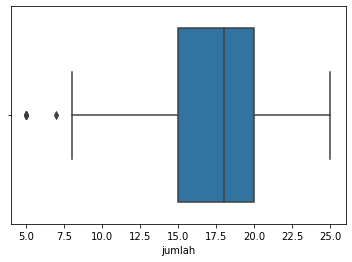

Rata-rata dari kolom jumlah 17.475247524752476



In [90]:
for i in range(2,len(df.columns)) :
    col = df.columns[i]
    print("Boxplot",col)
    sb.boxplot(x=df[col])
    plt.show()
    print("Rata-rata dari kolom",col, df[col].mean())
    print()

Dari Boxplot diatas kita dapat melihat rentang nilai dari tiap kolom pada data yang akan kita analisis 

Semua kolom kecuali kolom jumlah memiliki rentang nilai dengan nilai tertinggi adalah 1 dan nilai maksimal adalah 5
nilai 1 dapat kita artikan sebagai sangat tidak penting dan nilai 5 dapat kita artikan sebagai sangat penting


Rata-rata dari tiap kolom juga ditunjukkan melalui box plot tersebut



Untuk kolom jumlah kita dapat melihat bahwa nilai terendah adalah 5 sedangkan nilai tertinggi adalah 25


Sekarang mari kita lihat dari data cowok dan cewek

Boxplot time


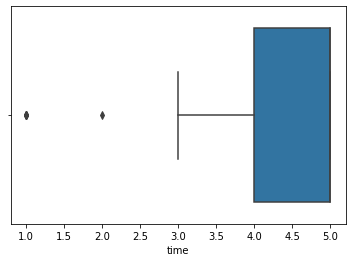

Rata-rata dari kolom time 4.185185185185185

Boxplot touch


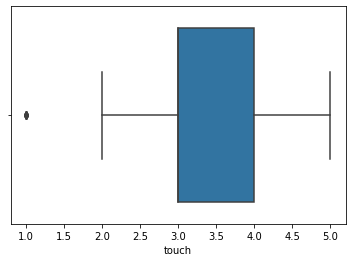

Rata-rata dari kolom touch 3.2962962962962963

Boxplot word


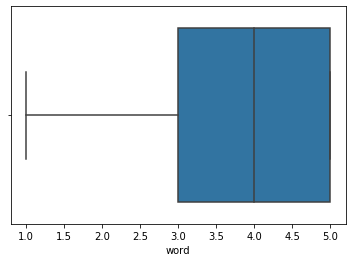

Rata-rata dari kolom word 3.8271604938271606

Boxplot present


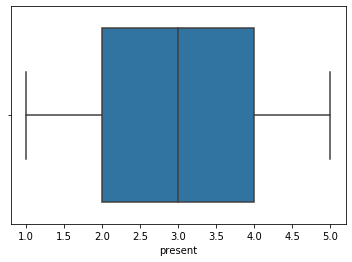

Rata-rata dari kolom present 2.740740740740741

Boxplot help


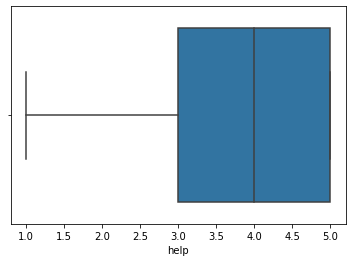

Rata-rata dari kolom help 3.765432098765432

Boxplot jumlah


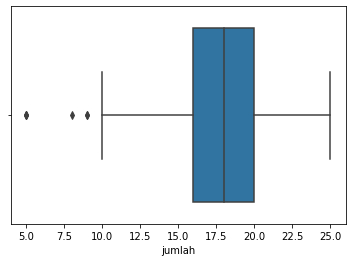

Rata-rata dari kolom jumlah 17.814814814814813



In [91]:
for i in range(2,len(df.columns)) :
    col = df.columns[i]
    print("Boxplot",col)
    sb.boxplot(x=df_cowok[col])
    plt.show()
    print("Rata-rata dari kolom",col, df_cowok[col].mean())
    print()

Dari Tabel dan rata-rata yang ditunjukkan diatas, Cowok cenderung menganggap penting waktu, bantuan, serta words of affirmation dari calon pacar

Boxplot time


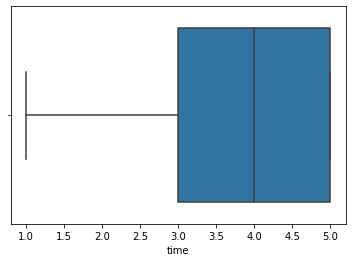

Rata-rata dari kolom time 3.75

Boxplot touch


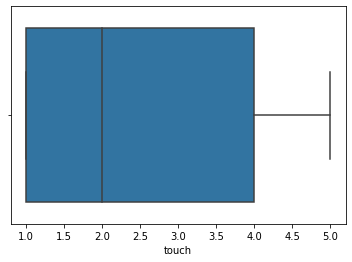

Rata-rata dari kolom touch 2.65

Boxplot word


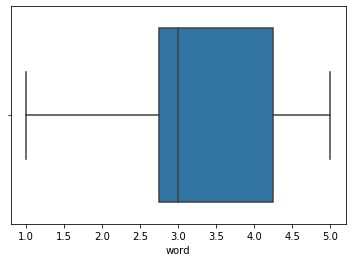

Rata-rata dari kolom word 3.3

Boxplot present


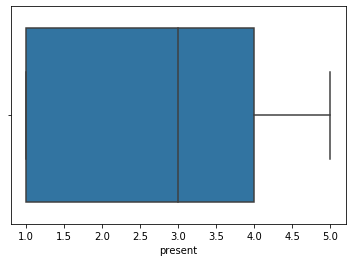

Rata-rata dari kolom present 2.7

Boxplot help


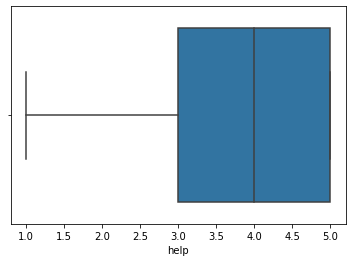

Rata-rata dari kolom help 3.7

Boxplot jumlah


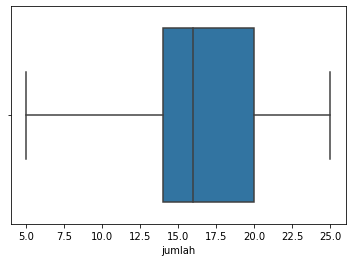

Rata-rata dari kolom jumlah 16.1



In [92]:
for i in range(2,len(df.columns)) :
    col = df.columns[i]
    print("Boxplot",col)
    sb.boxplot(x=df_cewek[col])
    plt.show()
    print("Rata-rata dari kolom",col, df_cewek[col].mean())
    print()

Dari tabel dan rata-rata yang ditunjukkan diatas, Cewek cenderung menganggap penting waktu dan bantuan dari pacar

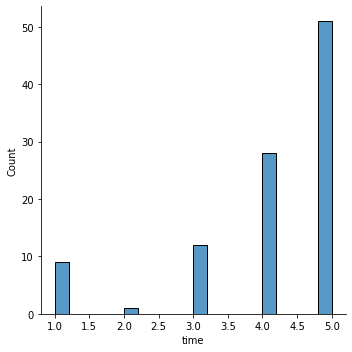

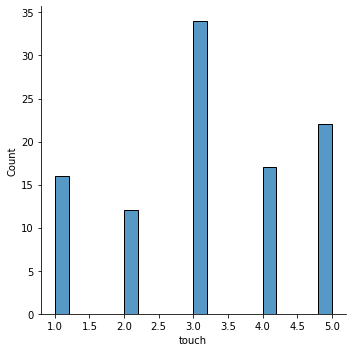

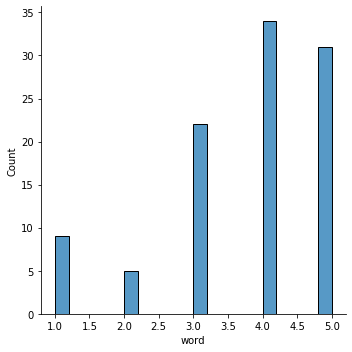

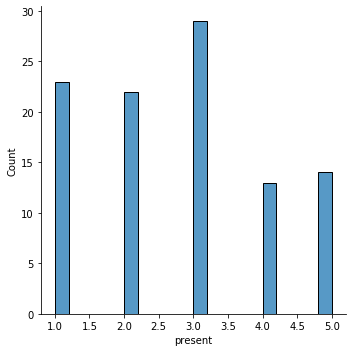

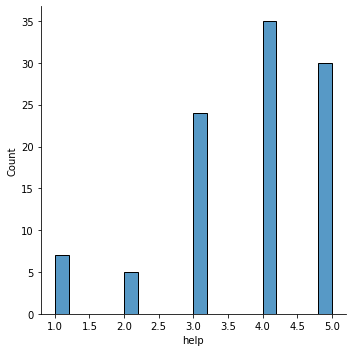

In [119]:
for i in range(2,len(df.columns)-1) :
    col = df.columns[i]
    sb.displot(df, x=col,bins=20)
    plt.show()

## Korelasi Data

### Semua Data

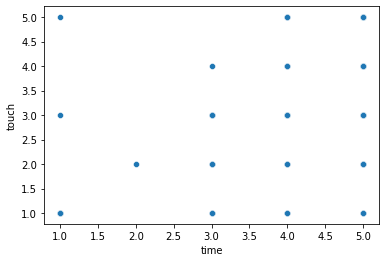

Korelasi kolom time dengan kolom touch
0.49013196975066076


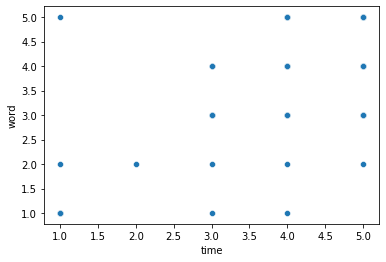

Korelasi kolom time dengan kolom word
0.6668265409012857


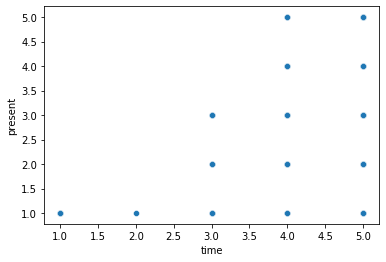

Korelasi kolom time dengan kolom present
0.4645200251285621


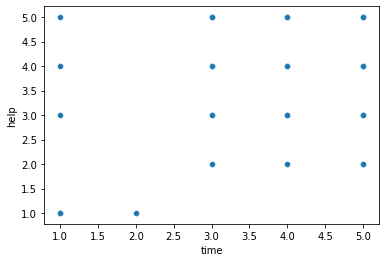

Korelasi kolom time dengan kolom help
0.4360946576784655


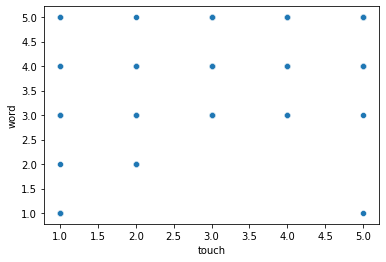

Korelasi kolom touch dengan kolom word
0.5806182058418959


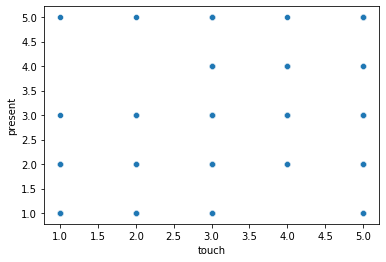

Korelasi kolom touch dengan kolom present
0.42691037459138176


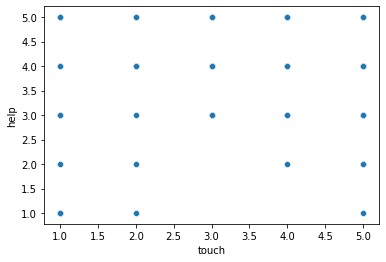

Korelasi kolom touch dengan kolom help
0.1913365823137339


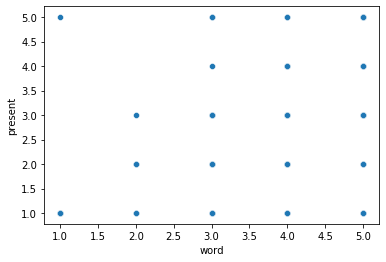

Korelasi kolom word dengan kolom present
0.4460455997814289


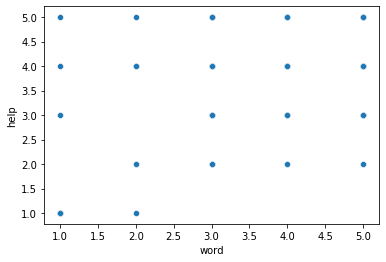

Korelasi kolom word dengan kolom help
0.4993809161468291


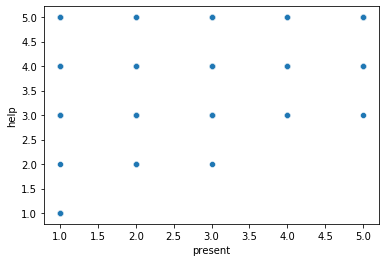

Korelasi kolom present dengan kolom help
0.43733350714314334


In [114]:
for i in range(2,len(df.columns)-1) :
    for j in range(i+1,len(df.columns)-1) :
        col_i = df.columns[i]
        col_j = df.columns[j]
        sb.scatterplot(data=df,x=col_i,y=col_j)
        plt.show()
        print("Korelasi kolom",col_i,"dengan kolom",col_j)
        print(df[col_i].corr(df[col_j]))

Untuk semua data, kolom satu dan kolom lainnya cenderung sedikit berkorelasi positif menuju tidak berkorelasi apabila dilihat dari tabel dan nilai korelasinya yang berada diantar 0 sampai 0.5

Mari kita lihat bagaimana korelasi yang terjadi pada data yang hanya ada cowok dan data yang hanya ada cewek saja

### Cowok

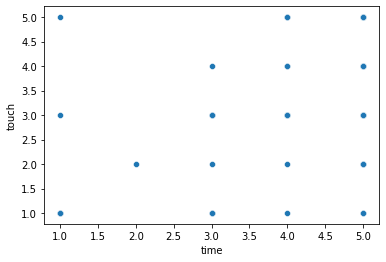

Korelasi kolom time dengan kolom touch
0.4534595630292711


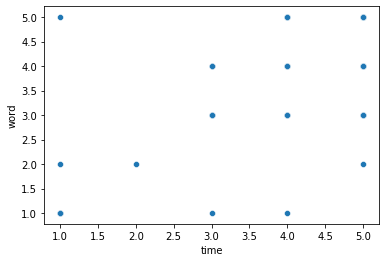

Korelasi kolom time dengan kolom word
0.5949178100925083


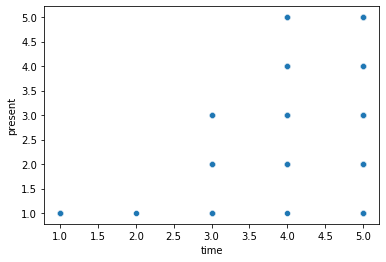

Korelasi kolom time dengan kolom present
0.40363914977892607


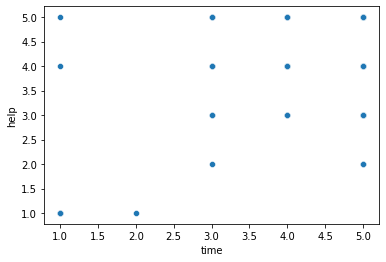

Korelasi kolom time dengan kolom help
0.38079933373784514


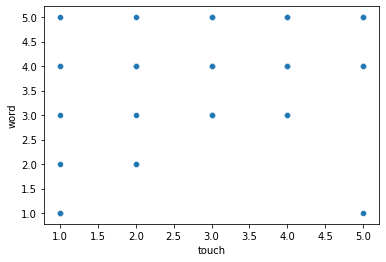

Korelasi kolom touch dengan kolom word
0.5499016806004059


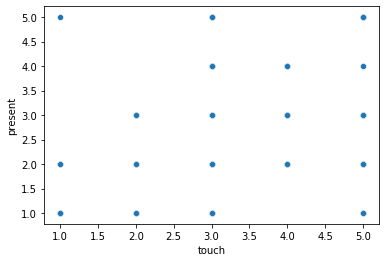

Korelasi kolom touch dengan kolom present
0.3723872614232689


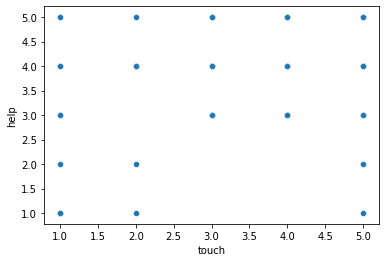

Korelasi kolom touch dengan kolom help
0.23217711950481337


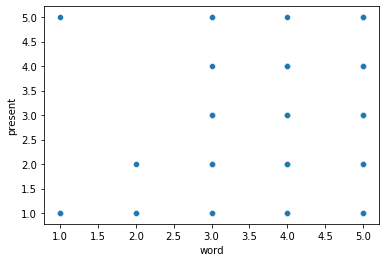

Korelasi kolom word dengan kolom present
0.3541704008692805


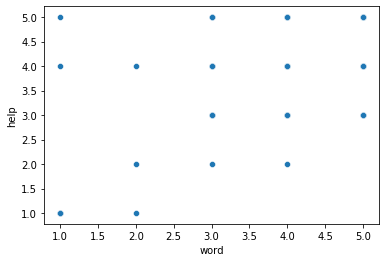

Korelasi kolom word dengan kolom help
0.5076202139579487


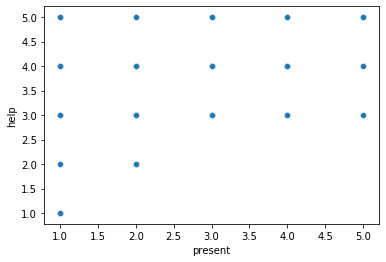

Korelasi kolom present dengan kolom help
0.45115592970763485


In [116]:
for i in range(2,len(df.columns)-1) :
    for j in range(i+1,len(df.columns)-1) :
        col_i = df.columns[i]
        col_j = df.columns[j]
        sb.scatterplot(data=df_cowok,x=col_i,y=col_j)
        plt.show()
        print("Korelasi kolom",col_i,"dengan kolom",col_j)
        print(df_cowok[col_i].corr(df[col_j]))

Untuk data cowok, dapat kita lihat nilai korelasi kolom word dengan kolom help dan kolom time dengan kolom word serta kolom touch dengan kolom word memiliki nilai diatas 0.5  

Hal ini dapat disimpulkan bahwa pentingnya word of affirmation dan pentingnya bantuan dari pacar bagi cowok berbanding lurus 

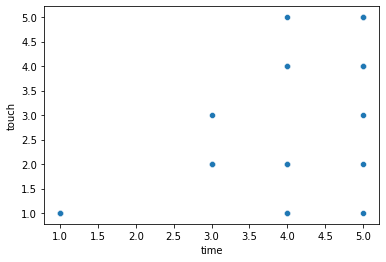

Korelasi kolom time dengan kolom touch
0.5448426908045321


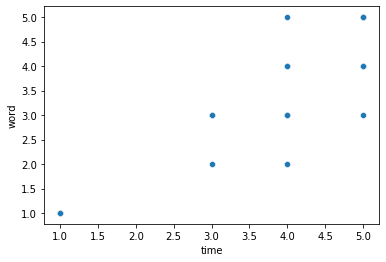

Korelasi kolom time dengan kolom word
0.8478275621641269


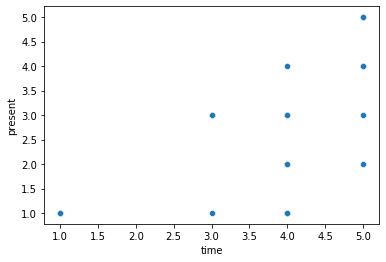

Korelasi kolom time dengan kolom present
0.6726499756719109


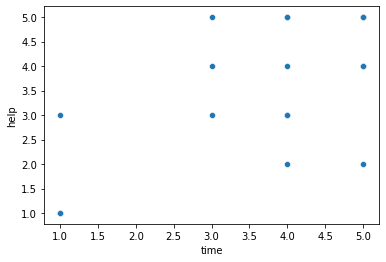

Korelasi kolom time dengan kolom help
0.5976489372632366


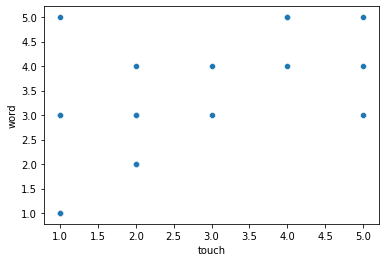

Korelasi kolom touch dengan kolom word
0.6140630637437213


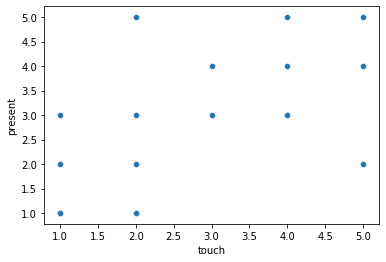

Korelasi kolom touch dengan kolom present
0.6262344503844921


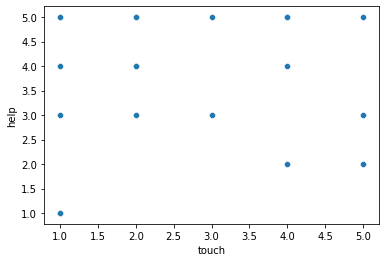

Korelasi kolom touch dengan kolom help
0.07389140601065519


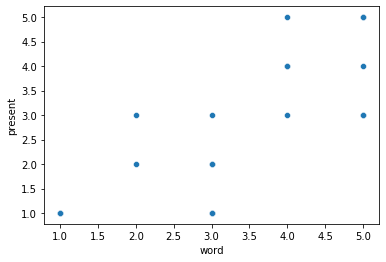

Korelasi kolom word dengan kolom present
0.7549621449822698


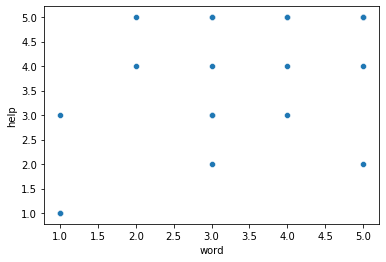

Korelasi kolom word dengan kolom help
0.4917127071823201


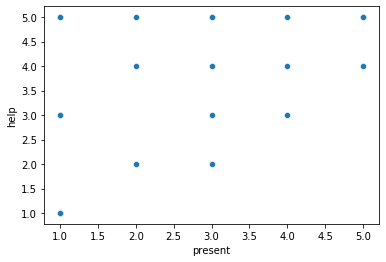

Korelasi kolom present dengan kolom help
0.3984522431850867


In [117]:
for i in range(2,len(df.columns)-1) :
    for j in range(i+1,len(df.columns)-1) :
        col_i = df.columns[i]
        col_j = df.columns[j]
        sb.scatterplot(data=df_cewek,x=col_i,y=col_j)
        plt.show()
        print("Korelasi kolom",col_i,"dengan kolom",col_j)
        print(df_cewek[col_i].corr(df[col_j]))

Untuk data cewek, hampir semua kolom berkorelasi positif dengan kolom lainnya kecuali hubungan kolom present dengan kolom help dan kolom word dengan kolom help

Dengan ini dapat kita simpulkan bahwa pentingnya hadiah dan pentingnya bantuan dari calon pacar tidak terlalu berhubungan sebagaimana dengan pentingnya bantuan dan pentingnya kata-kata dari calon pacar. Selain itu semuanya memiliki hubungan yangg berbanding lurus

Insight yang didapat dari analisis data disini adalah kita harus membagi data ke dalam jenis tertentu agar kita dapat melihat korelasi dari data yang satu dan yang lainnya

Dapat kita lihat ketika kita mencari korelasi antara kedua kolom pada semua data, terlihat sekilas bahwa semua kolom tidak memiliki hubungan dengan kolom lainnya. Tetapi saat kita melihat korelasi data pada data cowok dan data cewek kita dapat menemukan korelasi antara kedua kolom tertentu

Insight-insight lainnya kebanyakan ditulis dibawah tabel dan grafik

## Bonus : Model Development

Kita akan menggunakan algoritma KNN untuk mencari "jodoh" berdasarkan data yang ada diatas 

Kenapa kita menggunakan KNN? Karena mencari jodoh adalah mencari preferensi yang hampir sama atau paling dekat sebagaimana KNN yang mengelompokkan data berdasarkan jarak yang terdekat.

In [134]:
co_x = df_cowok.drop(['name','gender','jumlah'],axis=1)
ce_x = df_cewek.drop(['name','gender','jumlah'],axis=1)

In [135]:
co_x

time  touch  word  present  help
0       5      5     4        1     3
2       4      3     4        4     4
3       5      5     5        2     3
4       5      5     5        2     4
5       5      5     4        2     2
..    ...    ...   ...      ...   ...
95      5      4     4        4     5
96      5      1     4        2     3
98      5      5     5        5     4
99      1      1     1        1     1
100     5      5     5        5     4

[81 rows x 5 columns]

In [136]:
co_nbrs = NearestNeighbors(n_neighbors = 5).fit(co_x)
ce_nbrs = NearestNeighbors(n_neighbors = 5).fit(ce_x)

In [150]:
X = df.drop(["name","gender","jumlah"],axis=1)
test = X[df["name"] == "B****"].values

In [151]:
_,idx = ce_nbrs.kneighbors(test)

In [152]:
idx

array([[16, 18, 17, 19,  0]], dtype=int64)

In [153]:
df_cewek.iloc[idx[0]]["name"]

73                                                 R***
93                                              F******
79    a*********************************************...
97                                        K************
1                                                 L****
Name: name, dtype: object